In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_selection import SelectKBest, f_regression
sns.set_style('whitegrid')
plt.style.use('default')

EDA (Exploratory Data Analysis)

In [ ]:
df = pd.read_excel('marketing_campaign.xlsx')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2240, 29)


In [ ]:
print("Missing Values:", df.isnull().sum())

Missing Values: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df1 = df.copy()

In [ ]:
# Drop columns that are IDs or system columns
df1.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True, errors='ignore')

print("Shape after dropping irrelevant columns:", df1.shape)

Shape after dropping irrelevant columns: (2240, 26)


### Feature Engineering

In [ ]:
# Fill missing Income with median
df1['Income'] = df1['Income'].fillna(df1['Income'].median())

In [ ]:
# Total products purchased
df1['Total_Products'] = df1[['MntWines','MntFruits','MntMeatProducts',
                             'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [ ]:
# Total purchases
df1['Total_Purchases'] = df1[['NumDealsPurchases','NumWebPurchases',
                              'NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

In [ ]:
# Family Size = Kidhome + Teenhome + 2 (for parents)
if all(col in df1.columns for col in ['Kidhome','Teenhome']):
    df1['Family_Size'] = df1['Kidhome'] + df1['Teenhome'] + 2
else:
    print("Kidhome/Teenhome columns not found, skipping Family_Size")

In [ ]:
#Age from Year_Birth
if 'Year_Birth' in df1.columns:
    df1['Age'] = 2025 - df1['Year_Birth']  # assuming current year is 2025
else:
    print("Year_Birth column not found, skipping Age")

In [ ]:
# dropping unnecessary columns
df1.drop(
    columns=[
        "Year_Birth","Kidhome","Teenhome",
        "MntWines","MntFruits","MntMeatProducts",
        "MntFishProducts","MntSweetProducts","MntGoldProds",
        "NumWebPurchases","NumCatalogPurchases","NumStorePurchases"
    ],
    inplace=True
)

In [ ]:
print("Shape after feature engineering:", df1.shape)
df1.head()

Shape after feature engineering: (2240, 18)


,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Products,Total_Purchases,Family_Size,Age
0,Graduation,Single,58138.0,2012-09-04,58,3,7,0,0,0,0,0,0,1,1617,25,2,68
1,Graduation,Single,46344.0,2014-03-08,38,2,5,0,0,0,0,0,0,0,27,6,4,71
2,Graduation,Together,71613.0,2013-08-21,26,1,4,0,0,0,0,0,0,0,776,21,2,60
3,Graduation,Together,26646.0,2014-02-10,26,2,6,0,0,0,0,0,0,0,53,8,3,41
4,PhD,Married,58293.0,2014-01-19,94,5,5,0,0,0,0,0,0,0,422,19,3,44


 ### Visualizations

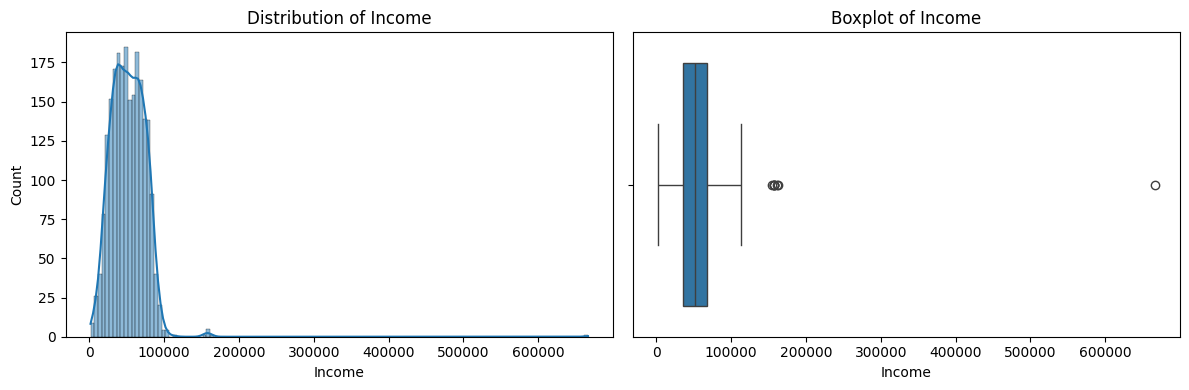

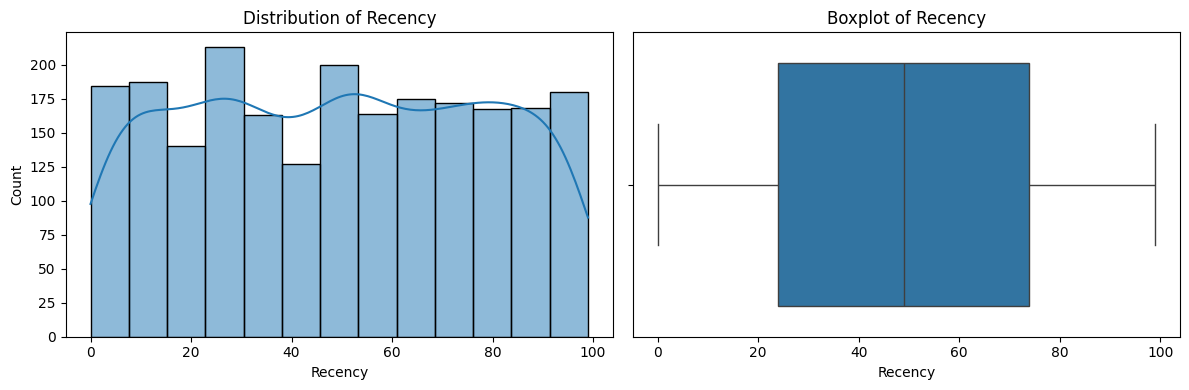

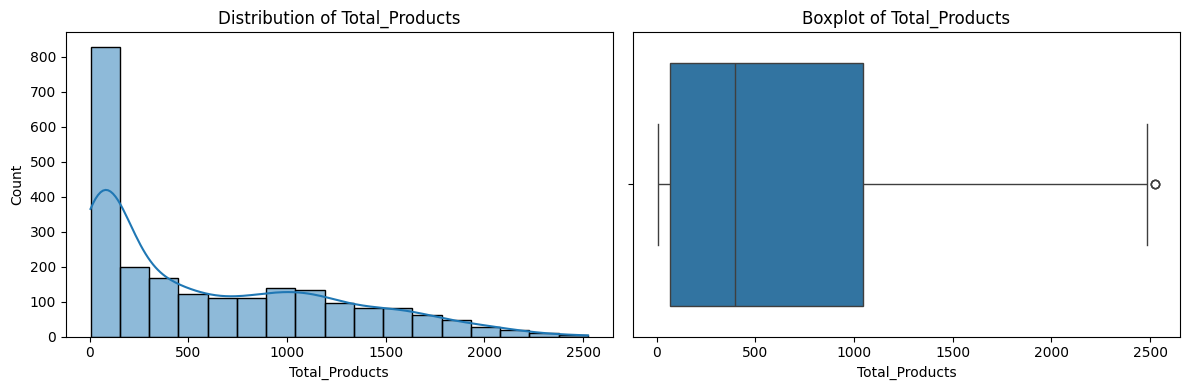

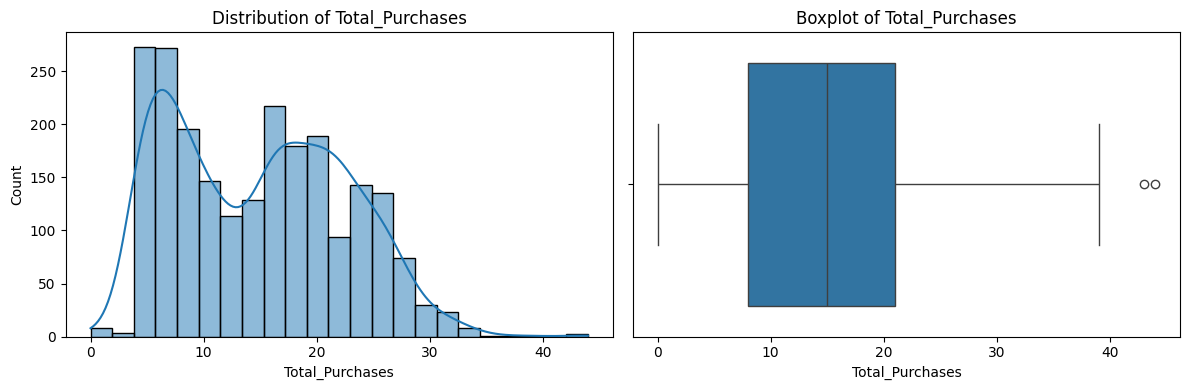

In [ ]:
numerical_cols = ['Income', 'Recency', 'Total_Products', 'Total_Purchases']

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df1[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df1[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [ ]:
print("Skewness:\n", df1[numerical_cols].skew())

Skewness:
 Income             6.800947
Recency           -0.001987
Total_Products     0.860841
Total_Purchases    0.252111
dtype: float64


###Visual inspection of outliers before cleaning:

This step helps to easily spot unusual or extreme values in numerical data using boxplots. Boxplots clearly show values that lie far outside the normal range of the data.

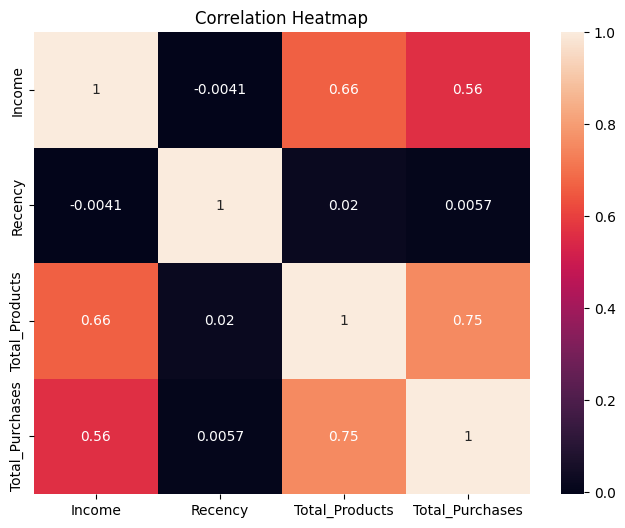

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df1[numerical_cols].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()

This step is used to analyze the relationship between numerical features and identify any strong correlations among them. The heatmap visually represents how closely variables move together.

In [ ]:
# Data Transformation
# Log transform skewed features
log_cols = ['Income', 'Total_Products', 'Total_Purchases', 'Age']

for col in log_cols:
    df1[f'{col}_log'] = np.log1p(df1[col])

###Log transformation of skewed features:
In this step, log transformation is applied to highly skewed numerical features to reduce skewness and make the data more evenly distributed.

Log transformation reduces the effect of very large values and helps bring the data closer to a normal distribution, which improves further analysis and modeling.

In [ ]:
# Function to cap outliers
def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(col, lower, upper)

In [ ]:
# Features where outliers matter (distance-based model)
outlier_cols = ['Age', 'Income', 'Total_Products', 'Total_Purchases', 'Recency']

# Apply outlier capping
df1[outlier_cols] = df1[outlier_cols].apply(cap_outliers)

By capping outliers in Income, Total_Products, Total_Purchases, and Recency, we ensure that the clustering process is more stable, balanced, and representative of true customer behavior.

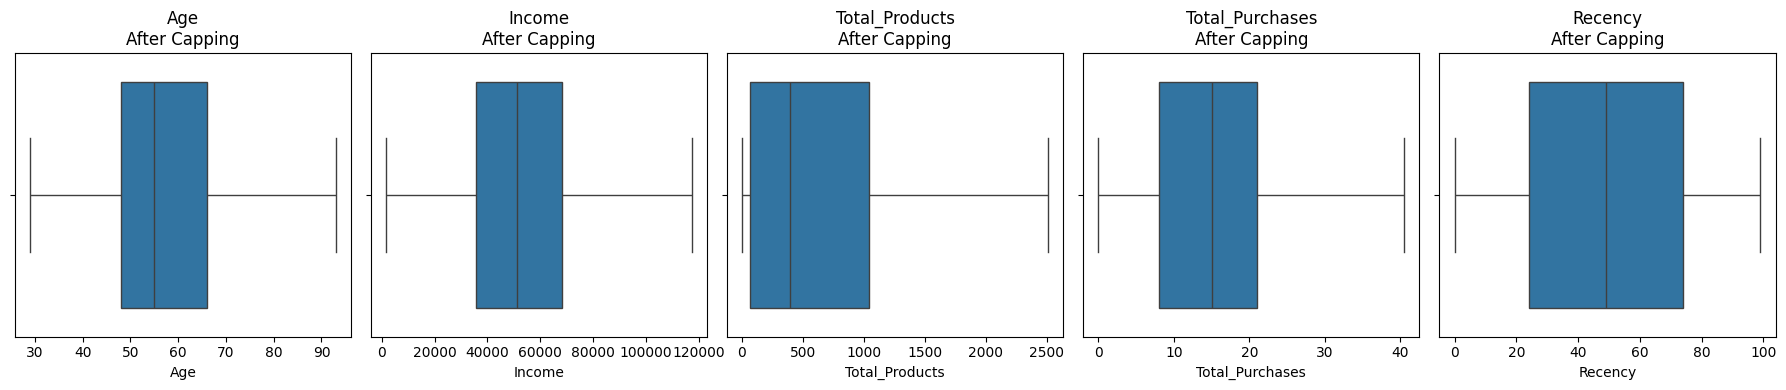

In [ ]:
features = ['Age', 'Income', 'Total_Products', 'Total_Purchases', 'Recency']

fig, axes = plt.subplots(1, len(features), figsize=(18, 4))

for i, col in enumerate(features):
    sns.boxplot(x=df1[col], ax=axes[i])
    axes[i].set_title(f'{col}\nAfter Capping')

plt.tight_layout()
plt.show()

In [ ]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df1, drop_first=True)

One-hot encoding of categorical variables:
This step changes categorical data into numbers so that machine learning models can understand them.

#Model Building

In [ ]:
# Selecting key features for customer segmentation
# These features reflect customer behavior and value
clustering_features = ['Age', 'Total_Products', 'Total_Purchases', 'Income', 'Recency']

# Create feature matrix
X = df1[clustering_features]

# Scale features
# Distance-based algorithms (KMeans, Hierarchical, DBSCAN)
# require scaling so all features contribute equally
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature selection and scaling:
In this step, important numerical features related to customer details and buying behavior were selected. These features include Age, Income, Recency, Total Products, and Total Purchases.

Since clustering methods like KMeans, Hierarchical, and DBSCAN depend on distance calculations, feature scaling is required. Therefore, StandardScaler was used to scale the data so that all features are on the same scale and contribute equally to the clustering results.

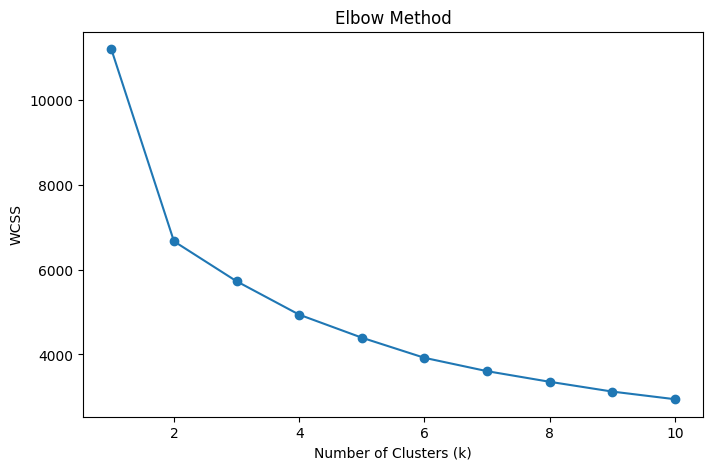

In [ ]:
# Store WCSS values
wcss = []

# Elbow method
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Explained Variance Ratio: [0.50904059 0.20090632]
Total Variance Explained: 0.7099469090680197


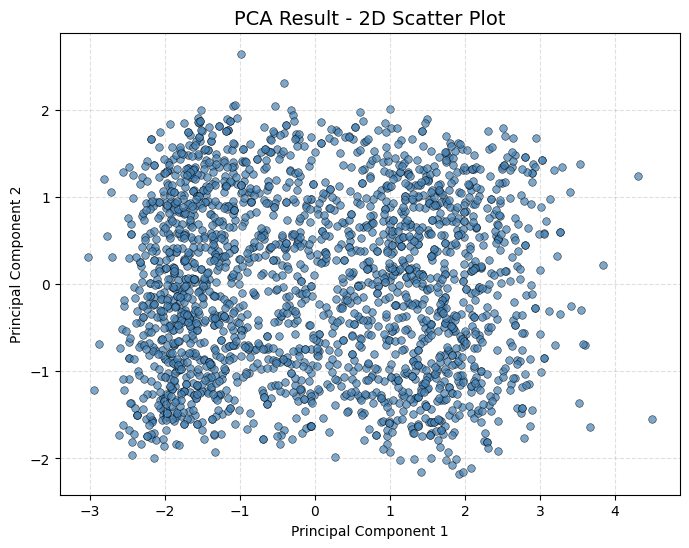

In [ ]:
# Apply PCA to reduce features into 2 principal components
pca = PCA(n_components=2, random_state=42)

# Transform scaled data
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for PCA output
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Variance explained
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())

# Improved PCA visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    color='steelblue',
    s=30,
    edgecolor='black',
    alpha=0.7
)

plt.title("PCA Result - 2D Scatter Plot", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()


#Kmeans Clustering

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
# n_clusters=3 to segment customers into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit model on PCA-reduced data and get cluster labels
df1['KMeans_Cluster'] = kmeans.fit_predict(X_pca)


Simple and fast clustering algorithm,
Works well for large datasets,
Easy to interpret results,
Suitable when number of clusters is known so we use K-means Clustering

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Get labels and compute scores (one step)
labels = kmeans.labels_  # or df1['KMeans_Cluster']
sil = silhouette_score(X_pca, labels)     # Higher → better clusters
db  = davies_bouldin_score(X_pca, labels) # Lower → better clusters
ch  = calinski_harabasz_score(X_pca, labels) # Higher → compact/separated

# Print neatly
print("KMeans Scores:")
print(f"Silhouette: {sil:.3f}")
print(f"Davies-Bouldin: {db:.3f}")
print(f"Calinski-Harabasz: {ch:.0f}")


KMeans Scores:
Silhouette: 0.428
Davies-Bouldin: 0.849
Calinski-Harabasz: 2435


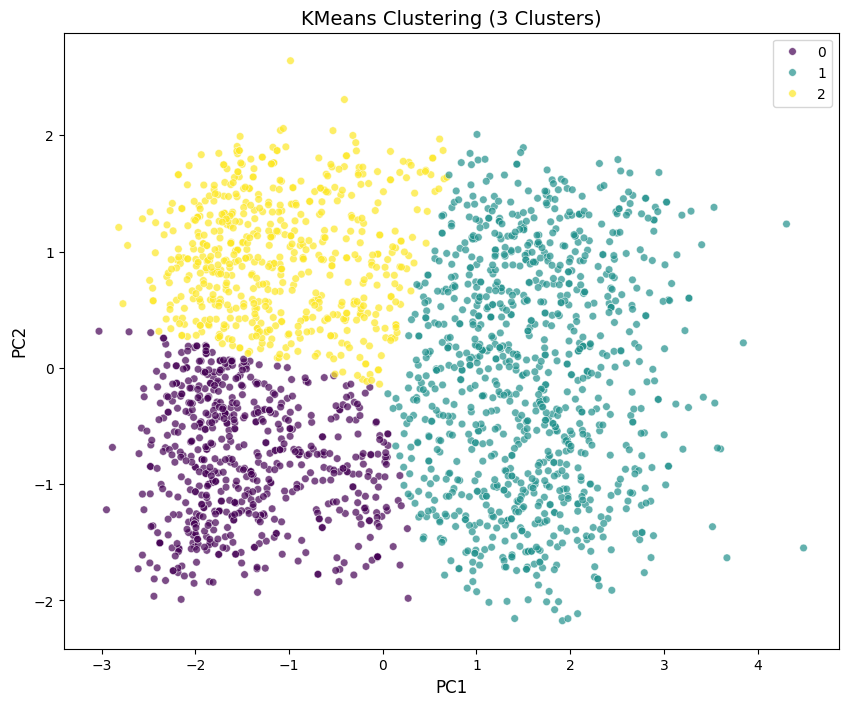

In [ ]:
# Visualize
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=labels,
    palette='viridis',  # Changed: Vibrant rainbow colors
    s=30,             # Changed: Larger points (default ~36)
    alpha=0.7          # Slight transparency for overlap
)
plt.title("KMeans Clustering (3 Clusters)", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.show()

We can clearly see three well-separated clusters, which confirms that KMeans worked effectively.

The separation indicates meaningful customer segments based on age, income, recency, and purchase behavior.

In [ ]:
# Profile clusters: average feature values per cluster
kmeans_profile = (
    df1
    .groupby('KMeans_Cluster')[clustering_features]
    .mean()
    .round(1)
)

# Better display with styled formatting
kmeans_profile.style.background_gradient(cmap='viridis')


,Age,Total_Products,Total_Purchases,Income,Recency
KMeans_Cluster,,,,,
0,51.800000,132.200000,8.800000,34808.600000,25.600000
1,58.600000,1167.800000,21.700000,70247.100000,48.300000
2,56.700000,170.600000,9.900000,39291.800000,75.200000


In [ ]:
# Business-friendly cluster names
kmeans_labels_map = {
    0: "High-Value Customers",
    1: "Mid-Value Customers",
    2: "Low-Value / At-Risk"
}

# Map numeric clusters to names
df1['KMeans_Segment'] = df1['KMeans_Cluster'].map(kmeans_labels_map)

# Quick preview
df1[['KMeans_Cluster', 'KMeans_Segment']].head()


,KMeans_Cluster,KMeans_Segment
0,1,Mid-Value Customers
1,2,Low-Value / At-Risk
2,1,Mid-Value Customers
3,0,High-Value Customers
4,2,Low-Value / At-Risk


In [ ]:
# Value counts for business insights
print(df1['KMeans_Segment'].value_counts())

# Business summary
print("\nCustomer Breakdown:")
print(f"High-Value: {df1['KMeans_Segment'].eq('High-Value Customers').sum()} customers")

KMeans_Segment
Mid-Value Customers     1002
High-Value Customers     636
Low-Value / At-Risk      602
Name: count, dtype: int64

Customer Breakdown:
High-Value: 636 customers


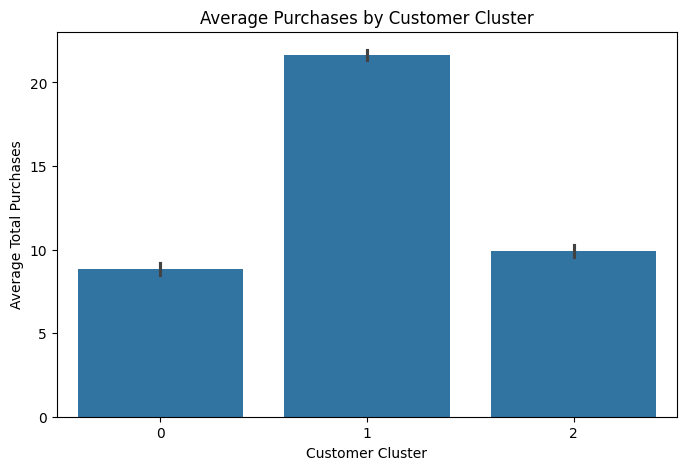

In [ ]:
# Visualizing average number of purchases for each customer cluster
plt.figure(figsize=(8, 5))

sns.barplot(
    x='KMeans_Cluster',     # cluster labels on x-axis
    y='Total_Purchases',    # purchase behavior on y-axis
    data=df1,
    estimator='mean'
)

plt.title("Average Purchases by Customer Cluster")
plt.xlabel("Customer Cluster")
plt.ylabel("Average Total Purchases")

plt.show()
